In [28]:
import analysis as an
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, date2num
from datetime import datetime
import plotly.express as px
from datetime import timedelta

df= an.main()
sns.set_style("whitegrid")
print(df)
df.dtypes

                                                 event pid  \
0                                interaction begins !!   6   
1               human prepares to show nao robot food.   6   
2             human is now showing nao robot the food.   6   
3                       nao robot starts to scan food.   6   
4      nao finishs scanning and then starts analyzing.   6   
..                                                 ...  ..   
296             nao robot starts to scan human's face.   5   
297    nao finishs scanning and then starts analyzing.   5   
298  nao finish analysis and tell the human face re...   5   
299               nao robot starts to give suggestion.   5   
300  human gives feedback after hearing the suggest...   5   

                   time trial  
0   2021-05-02 11:56:18     3  
1   2021-05-02 11:56:28     3  
2   2021-05-02 11:56:37     3  
3   2021-05-02 11:56:37     3  
4   2021-05-02 11:56:52     3  
..                  ...   ...  
296 2021-05-02 11:13:02     1  

event             object
pid               object
time      datetime64[ns]
trial             object
delta    timedelta64[ns]
dtype: object

In [29]:
# GENERATE OVEALL RUN TIME THINGS

participants= list(set(df['pid']))
runs = list(set(df['trial']))

print(participants)
print(runs)

run_df= pd.DataFrame()
for p in participants:
    for run in runs:
        pdf= df[(df['pid']== p) & (df['trial']==run)]
        
        run_df = run_df.append({
            'pid': p,
            'run': run,
            'total': int(pdf['delta'].sum().total_seconds()),
        }, ignore_index=True)
print(run_df)

['3', '6', '1', '2', '5', '4']
['3', '2', '1']
   pid run    total
0    3   3    154.0
1    3   2   2161.0
2    3   1    170.0
3    6   3    206.0
4    6   2    263.0
5    6   1   1752.0
6    1   3    151.0
7    1   2    257.0
8    1   1    381.0
9    2   3    271.0
10   2   2    169.0
11   2   1    306.0
12   5   3    211.0
13   5   2    266.0
14   5   1    920.0
15   4   3    251.0
16   4   2    403.0
17   4   1  67387.0


pid       object
run       object
total    float64
dtype: object


[Text(0.5, 0, 'Trial run'), Text(0, 0.5, 'Time Taken in seconds')]

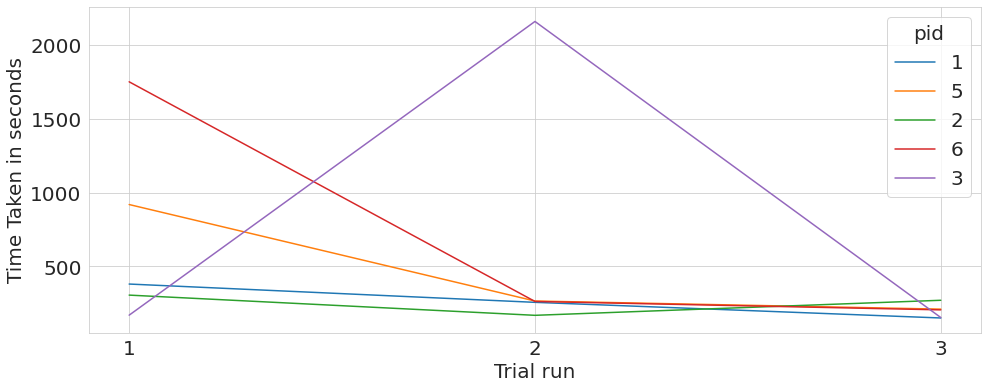

In [30]:
print(run_df.dtypes)
plt.figure(figsize=(16, 6))
# pdf = run_df[run_df['pid']=='6']
# pdf = pdf.sort_values(by='run', ascending= True)
# print(pdf)

run_df=run_df.sort_values(by='run', ascending = True)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

ax = sns.lineplot(x="run", y="total", hue='pid', data=run_df[run_df['pid']!='4'], ci = False)

# myFmt = DateFormatter("%H:%M:%S%s")
# ax.yaxis.set_major_formatter(myFmt)
# runs.sort()
# ax.set_xticks(range(len(runs))) # <--- set the ticks first
# ax.set_xticklabels(runs)
ax.set(xlabel='Trial run', ylabel='Time Taken in seconds')



In [34]:
df['endtime']= df['time'].shift(-1)
# https://stackoverflow.com/questions/31820578/how-to-plot-stacked-event-duration-gantt-charts-using-python-pandas
df['starttime']= df['time']

# Since the end time for interaction should be equal to its start time, and the start time for ending interaction is the end time...
p_list = list(set(df['pid']))
p_list.sort()
for i in p_list:
    if True:
        print(i)
        pdf = df[df['pid']==i]
#         print(pdf)
        pdf.iloc[-1, pdf.columns.get_loc('endtime')] = list(pdf['starttime'])[-1]+timedelta(seconds=10)
        # row = pdf[pdf["trial"]=='1'].iloc[-1]
        # row['starttime'] = row['endtime']
        # print(row)

        # pdf[row['starttime'],'endtime'] = row['endtime']
        fig = px.timeline(pdf, x_start="starttime", x_end="endtime", y="event", color="trial", template="simple_white")
        fig.update_yaxes(autorange="reversed",  showgrid=True) # otherwise tasks are listed from the bottom up
        fig.show()

1


2


3


4


5


6
